In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import scipy
from scipy import sparse as sp
from sklearn.decomposition import TruncatedSVD
import matplotlib
from scipy.sparse import coo_matrix
from tqdm import tqdm
%matplotlib inline
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.tools as tls

# print(check_output(["ls", "../input"]).decode("utf8"))

In [2]:
df = pd.read_csv("./Data/train.csv").fillna("")
df.head() 

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
dfq1, dfq2 = df[['qid1', 'question1']], df[['qid2', 'question2']]
dfq1.columns = ['id', 'question']
dfq2.columns = ['id', 'question']

# merge two two dfs, there are two nans for question
dfqa = pd.concat((dfq1, dfq2), axis=0).fillna("")

In [5]:
dfq1.head()

,id,question
0,1,What is the step by step guide to invest in sh...
1,3,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,5,How can I increase the speed of my internet co...
3,7,Why am I mentally very lonely? How can I solve...
4,9,"Which one dissolve in water quikly sugar, salt..."


In [6]:
dfqa.columns

Index(['id', 'question'], dtype='object')

In [7]:
dfqa.shape

(808580, 2)

In [8]:
mq1 = TfidfVectorizer(max_features = 1000).fit_transform(dfqa['question'].values)

In [9]:
mq1.shape

(808580, 1000)

In [10]:
r1 = scipy.dot(mq1[0,:].T, mq1[1,:])
r1.shape

(1000, 1000)

In [11]:
def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure(figsize= (10,10))
    ax = fig.add_subplot(111, facecolor='black')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax


100%|██████████| 1/1 [00:00<00:00,  7.29it/s]


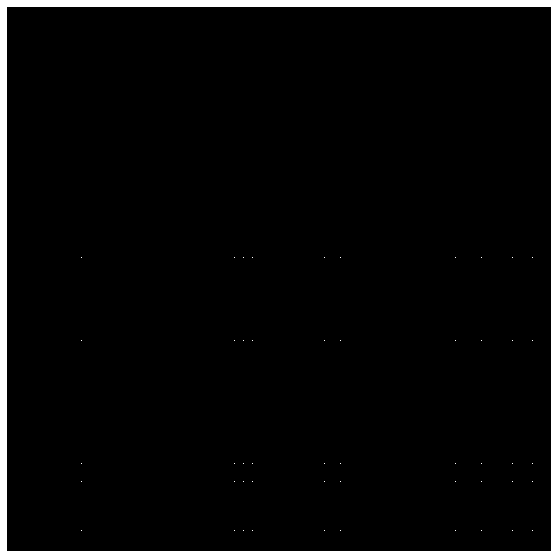

In [18]:
even = [ele for ele in range(dfqa.shape[0]) if ele%2 == 0]
odd = [ele for ele in range(dfqa.shape[0]) if ele%2 != 0]
odd = [1]
for ele in tqdm(odd):
    r1 = scipy.dot(mq1[ele,:].T, mq1[ele+1,:])
    m = coo_matrix(np.ceil(r1))
    ax = plot_coo_matrix(m)
    ax.figure.savefig('id_{}&id_{}.png'.format(ele,ele+1))
    image = rgb2gray(cv2.imread('./tarining_image/id_{}&id_{}.png'.format(ele,ele+1))).reshape(-1)
#     ax.figure.show()
    

In [89]:
import cv2
from skimage.color import rgb2gray
import copy
image = rgb2gray(cv2.imread('./tarining_image/id_1&id_2.png')).reshape(-1)
image[image == 1] = 0
x_train = image.reshape(1,720,720)
x_test = image.reshape(1,720,720)
y_test = np.array([1])
y_train = np.array([1])

In [90]:
y_train.shape

(1,)

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import callbacks
from sklearn.cross_validation import train_test_split
import tensorflow as tf
tf.reset_default_graph() 
batch_size = 128
num_classes = 1
epochs = 3

img_rows, img_cols = 720, 720

if K.image_data_format() == 'channels_first':
		x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
		x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
		input_shape = (1, img_rows, img_cols)
else:
		x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
		x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
		input_shape = (img_rows, img_cols, 1)

		
x_train = x_train.astype('float32')
# x_train, _, y_train, _ = train_test_split(x_train, y_train, test_size = 0.99, random_state = 0)
x_test = x_test.astype('float32')
# _, x_test, _, y_test = train_test_split(x_test, y_test, test_size = 0.01, random_state = 0)
# x_train /= 255
# x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
								 activation='relu',
								 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
# model.add(Dense(128, activation='relu',name='aux_output'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.mean_absolute_error,
							optimizer=keras.optimizers.Adadelta(),
							metrics=['accuracy'])

model.fit(x_train, y_train,
					batch_size=batch_size,
					epochs=epochs,
					verbose=1)


x_train shape: (1, 720, 720, 1)
1 train samples
1 test samples
Epoch 1/3


In [81]:
x_train.shape

(0, 720, 720, 1)

In [82]:
y_train.shape

(0, 10, 2, 1)

In [85]:
y_train

[0]